### Dependancy Imports

In [89]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

# Specific imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

### Import Data

In [90]:
# Assign data to variable
dataset = pd.read_csv('HousingData.csv')
dataset = dataset.head(229)

# Convert the date strings into datetime objects
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Convert Date Features to a number format
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month

# Take a small look at the dataframe produced
print(dataset.head())
print(dataset.shape)

        Date  Composite_HPI  Single_Family_HPI  One_Storey_HPI  \
0 2005-01-01          100.0              100.0           100.0   
1 2005-02-01          101.0              101.0           101.2   
2 2005-03-01          102.1              102.1           102.4   
3 2005-04-01          103.1              103.2           103.8   
4 2005-05-01          103.8              103.8           104.6   

   Two_Storey_HPI  Townhouse_HPI  Apartment_HPI  Composite_Benchmark  \
0           100.0          100.0          100.0             237700.0   
1           100.9          100.9          101.3             240100.0   
2           101.9          101.7          102.3             242600.0   
3           102.9          102.5          103.1             245100.0   
4           103.4          103.2          104.1             246700.0   

   Single_Family_Benchmark  One_Storey_Benchmark  Two_Storey_Benchmark  \
0                 257600.0              205000.0              300000.0   
1                 2601

### Split data in to features

In [99]:
# Split data into X and y sets
X = dataset[[
    'Year',
    'Month',
    'Composite_HPI',
    'Single_Family_Benchmark',
    'One_Storey_Benchmark',
    'Two_Storey_Benchmark',
    'Townhouse_Benchmark',
    'Apartment_Benchmark'
    ]]

y = dataset['Composite_Benchmark']

### Split the dataset

In [92]:
# Set up your sets into train and test variables
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0
    )

# Show the user a sample of the dataset for reference
print(f"X-train sample: {X_train.head()}")
print(f"y-train sample: {y_train.head()}")

X-train sample:      Year  Month  Composite_HPI  Single_Family_Benchmark  \
33   2007     10          134.1                 343000.0   
71   2010     12          139.9                 358500.0   
154  2017     11          229.0                 594500.0   
205  2022      2          355.7                 943800.0   
106  2013     11          160.2                 417300.0   

     One_Storey_Benchmark  Two_Storey_Benchmark  Townhouse_Benchmark  \
33               284700.0              388500.0             277200.0   
71               283400.0              413900.0             288800.0   
154              442100.0              703900.0             466200.0   
205              722200.0             1099800.0             754200.0   
106              322400.0              486400.0             312300.0   

     Apartment_Benchmark  
33              239700.0  
71              251900.0  
154             402500.0  
205             567500.0  
106             266400.0  
y-train sample: 33     31870

### Setup Basic Model

In [93]:
# Plant the seeds to grow a basic forest
forest_model = RandomForestRegressor(random_state = 0)

### Hyper Parameters

In [100]:
# Setup parameters
param_dist = {'n_estimators': [
    50,
    100,
    150,
    200,
    250,
    300,
    350,
    400,
    450,
    500,
    550,
    600,
    650,
    700,
    750
    ]}

# Initialize the random search
random_search = RandomizedSearchCV(
    estimator = forest_model,
    param_distributions = param_dist,
    n_iter = 15,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state = 0
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the best selection for later
selected_params = random_search.best_params_

# Show the user the best parameter
print(f"Selected Param: {selected_params}")

Selected Param: {'n_estimators': 350}


### Final Model Set up

In [101]:
# Re-Initialize Random Forest using the selected Params
final_forest = RandomForestRegressor(
    n_estimators = selected_params['n_estimators'],
    random_state = 0
)

# Fit data to the new model
final_forest.fit(X_train, y_train)

# Make prediction to get a score to check
score_predict = final_forest.predict(X_test)

### Scoring

In [102]:
# Pass in your y test data and check it against your y predicted data
mse = mean_squared_error(y_test, score_predict)

# Share with the world!
print(f"Mean Squared Error: {mse}")

Initial Mean Squared Error: 13609729.002661912


### Create Future Data

In [96]:
# Create a dataset for future dates
future_dates = pd.date_range(start='2024-01-01', periods=120, freq='M')
future_data = pd.DataFrame({'Date': future_dates})

# Add the old data to the new set
future_data['Composite_HPI'] = dataset['Composite_HPI']
future_data['Single_Family_Benchmark'] = dataset['Single_Family_Benchmark']
future_data['One_Storey_Benchmark'] = dataset['One_Storey_Benchmark']
future_data['Two_Storey_Benchmark'] = dataset['Two_Storey_Benchmark']
future_data['Townhouse_Benchmark'] = dataset['Townhouse_Benchmark']
future_data['Apartment_Benchmark'] = dataset['Apartment_Benchmark']

# Create future dataset with date features
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month

# Grab features for prediction
features_for_prediction = future_data[[
    'Year',
    'Month',
    'Composite_HPI',
    'Single_Family_Benchmark',
    'One_Storey_Benchmark',
    'Two_Storey_Benchmark',
    'Townhouse_Benchmark',
    'Apartment_Benchmark'
    ]]

# Print a sample of the normalized future dataset
print(f"Normalized Future Data:\n {features_for_prediction.head()}")


Normalized Future Data:
    Year  Month  Composite_HPI  Single_Family_Benchmark  One_Storey_Benchmark  \
0  2024      1          100.0                 257600.0              205000.0   
1  2024      2          101.0                 260100.0              207400.0   
2  2024      3          102.1                 263000.0              210000.0   
3  2024      4          103.1                 265800.0              212700.0   
4  2024      5          103.8                 267500.0              214500.0   

   Two_Storey_Benchmark  Townhouse_Benchmark  Apartment_Benchmark  
0              300000.0             199600.0             172400.0  
1              302700.0             201400.0             174600.0  
2              305700.0             202900.0             176400.0  
3              308600.0             204500.0             177800.0  
4              310100.0             205900.0             179500.0  


### Predict Outcome

In [97]:
# Predict future prices
future_predictions = final_forest.predict(features_for_prediction)

print(future_predictions)

# Add predicted prices to future_data
future_data['Composite_Benchmark_Predicted'] = future_predictions

[249601.71428571 250682.         252854.28571429 254828.
 255924.85714286 257339.14285714 258454.57142857 260357.14285714
 263398.         263480.57142857 264072.28571429 264256.85714286
 265333.42857143 271202.57142857 275154.28571429 280609.42857143
 286185.14285714 287987.14285714 289901.14285714 292596.28571429
 293742.85714286 293530.85714286 293487.71428571 293518.
 295067.42857143 301101.42857143 305712.57142857 310241.14285714
 314595.42857143 319828.28571429 321249.71428571 322486.
 323584.57142857 323585.71428571 323296.57142857 322718.
 325012.         326951.14285714 329353.42857143 329636.85714286
 329494.28571429 328403.42857143 325134.28571429 323168.57142857
 321496.85714286 314739.14285714 309426.         302688.57142857
 300658.57142857 300086.28571429 300068.85714286 302385.71428571
 306378.28571429 310032.57142857 313544.57142857 318530.85714286
 321563.42857143 325153.71428571 327458.28571429 328001.42857143
 330668.         335984.         339095.71428571 341628.8

### Graphs

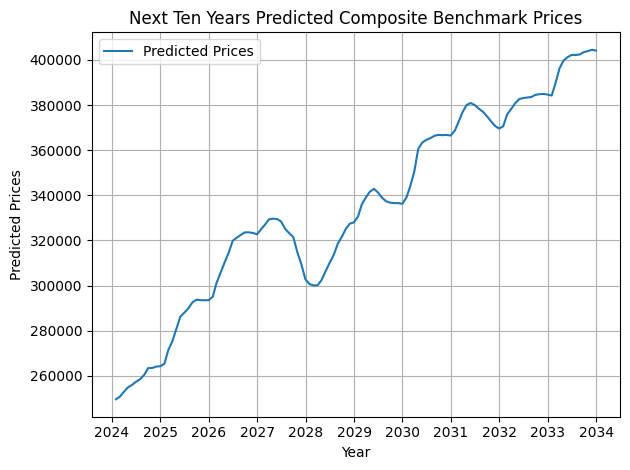

In [98]:
# Plot the predicted Composite Benchmark prices over time
plt.plot(
    future_data['Date'],
    future_data['Composite_Benchmark_Predicted'],
    label='Predicted Prices'
    )

# Set up the axis
plt.xlabel('Year')
plt.ylabel('Predicted Prices')
plt.title('Next Ten Years Predicted Composite Benchmark Prices')

# Make the graph look nice
plt.tight_layout()
plt.legend()
plt.grid(True)

# Save the graph for a rainy day
plt.savefig('PredictionGraph.svg', format='svg', bbox_inches='tight')

# Display the graph to the end user
plt.show()